In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dash
from dash import dcc, html
import plotly.express as px
import folium
import warnings

The project starts with importing the necessary libraries, including numpy, pandas, matplotlib, seaborn, dash, plotly, and folium. These libraries provide powerful tools for data manipulation, visualization, and building interactive dashboards.

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = pd.read_csv('data/climate_change_indicators.csv')
data_melted = data.melt(id_vars=['Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'], 
                        var_name='Year', 
                        value_name='Value')
data_melted['Year'] = data_melted['Year'].str.extract('(\d+)').astype(float)
print(data_melted.head())

                        Country ISO2 ISO3  \
0  Afghanistan, Islamic Rep. of   AF  AFG   
1                       Albania   AL  ALB   
2                       Algeria   DZ  DZA   
3                American Samoa   AS  ASM   
4      Andorra, Principality of   AD  AND   

                                           Indicator            Unit  \
0  Temperature change with respect to a baseline ...  Degree Celsius   
1  Temperature change with respect to a baseline ...  Degree Celsius   
2  Temperature change with respect to a baseline ...  Degree Celsius   
3  Temperature change with respect to a baseline ...  Degree Celsius   
4  Temperature change with respect to a baseline ...  Degree Celsius   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...     ECCS   
1  Food and Agriculture Organization of the Unite...     ECCS   
2  Food and Agriculture Organization of the Unite...     ECCS   
3  Food and Agriculture Organization

The data is then loaded from a CSV file named 'climate_change_indicators.csv' using pandas' read_csv() function. This dataset likely contains various climate change indicators for different countries over multiple years. The data is then preprocessed to prepare it for analysis and visualization.

During preprocessing, the data is melted using pandas' melt() function to transform it from a wide format to a long format. This makes it easier to analyze and visualize, as each row now represents a single observation (e.g., a country, year, and indicator combination).
This process is made necessary due to the necessity of creating a usable Year column to make the data visualization effective

In [4]:
print(data_melted.isnull().sum())

Country                   0
ISO2                    126
ISO3                      0
Indicator                 0
Unit                      0
Source                    0
CTS_Code                  0
CTS_Name                  0
CTS_Full_Descriptor       0
Year                    225
Value                  1490
dtype: int64


In [5]:
print(data_melted.describe())

               Year         Value
count  13950.000000  12685.000000
mean    1991.500000      2.532568
std       17.896172     17.194004
min     1961.000000     -2.062000
25%     1976.000000      0.076000
50%     1991.500000      0.487000
75%     2007.000000      0.986000
max     2022.000000    225.000000


Missing values in the melted dataset are identified using the isnull().sum() function, which counts the number of missing values in each column. Descriptive statistics of the dataset are also calculated using the describe() function to gain insights into the distribution of the data.

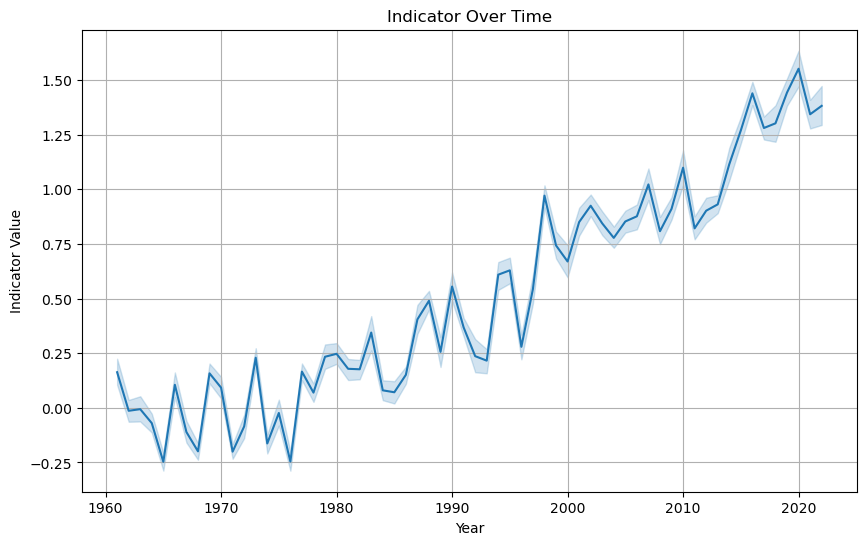

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_melted, x='Year', y='Value')
plt.title('Indicator Over Time')
plt.xlabel('Year')
plt.ylabel('Indicator Value')
plt.grid(True)
plt.show()

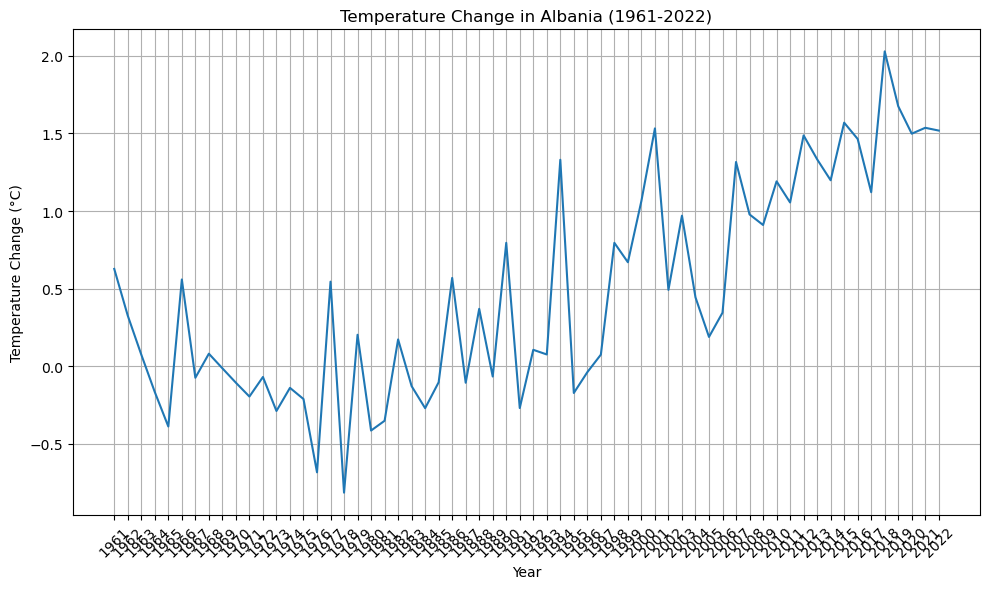

In [7]:
def plot_temperature_change_country(country_name, data):
    country_data = data[data["Country"] == country_name]
    years = [str(year) for year in range(1961, 2023)]  # Assuming the years are columns F1961 to F2022
    temperatures = country_data.loc[:, "F1961":"F2022"].values.flatten()
    
    plt.figure(figsize=(10, 6))
    plt.plot(years, temperatures)
    plt.title(f"Temperature Change in {country_name} (1961-2022)")
    plt.xlabel("Year")
    plt.ylabel("Temperature Change (°C)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_temperature_change_country("Albania", data)

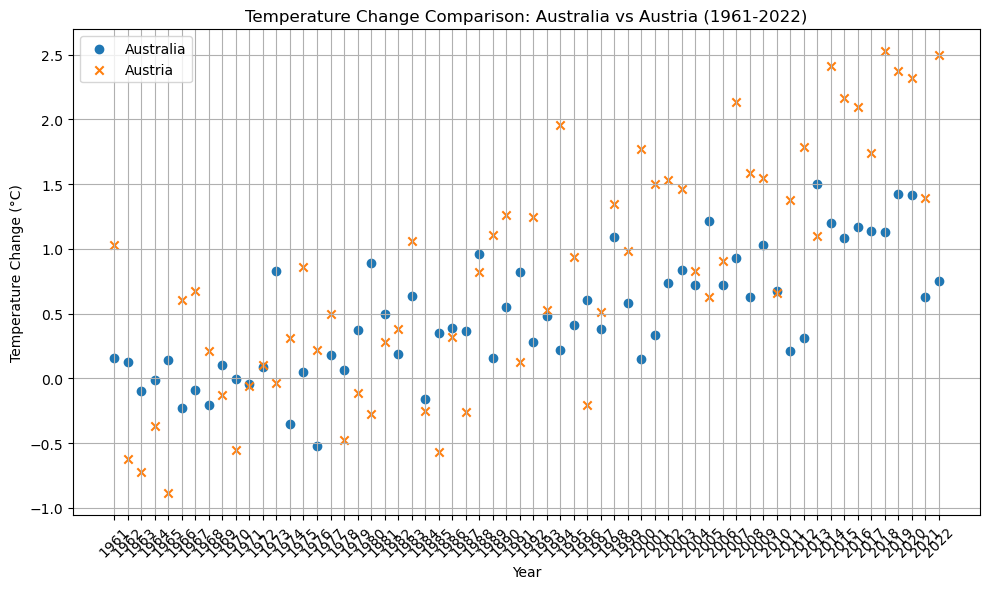

In [8]:
def plot_temperature_comparison(country1, country2, data):
    country1_data = data[data["Country"] == country1].iloc[:, 10:]  # Assuming the temperature data starts from column F1961
    country2_data = data[data["Country"] == country2].iloc[:, 10:]
    
    years = [str(year) for year in range(1961, 2023)]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(years, country1_data.values.flatten(), label=country1, marker='o')
    plt.scatter(years, country2_data.values.flatten(), label=country2, marker='x')
    plt.title(f"Temperature Change Comparison: {country1} vs {country2} (1961-2022)")
    plt.xlabel("Year")
    plt.ylabel("Temperature Change (°C)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_temperature_comparison("Australia", "Austria", data)

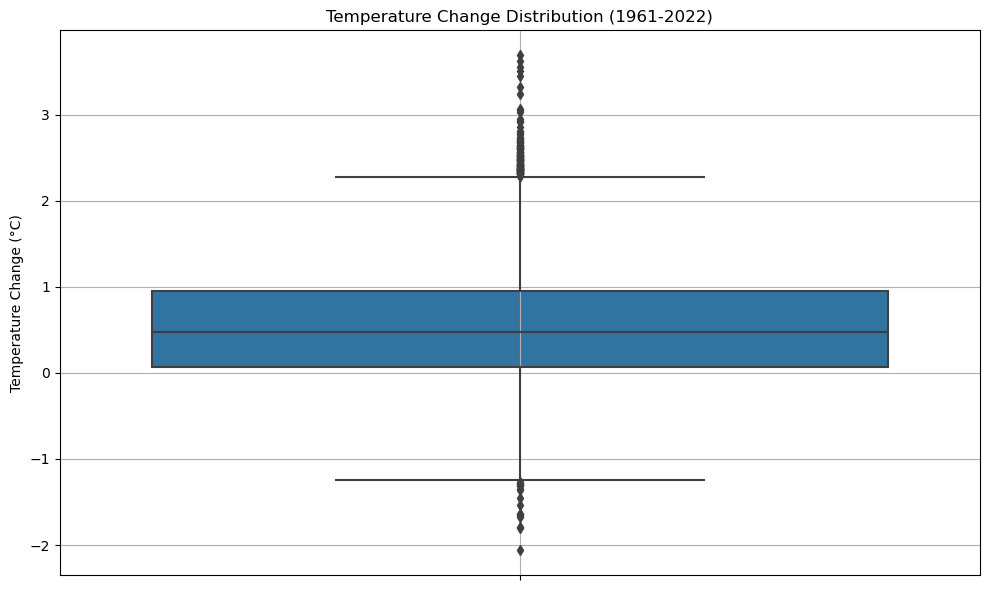

In [9]:
def plot_temperature_distribution(data):
    temperature_data = data.loc[:, "F1961":"F2022"].values.flatten()
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=temperature_data)
    plt.title("Temperature Change Distribution (1961-2022)")
    plt.ylabel("Temperature Change (°C)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_temperature_distribution(data)

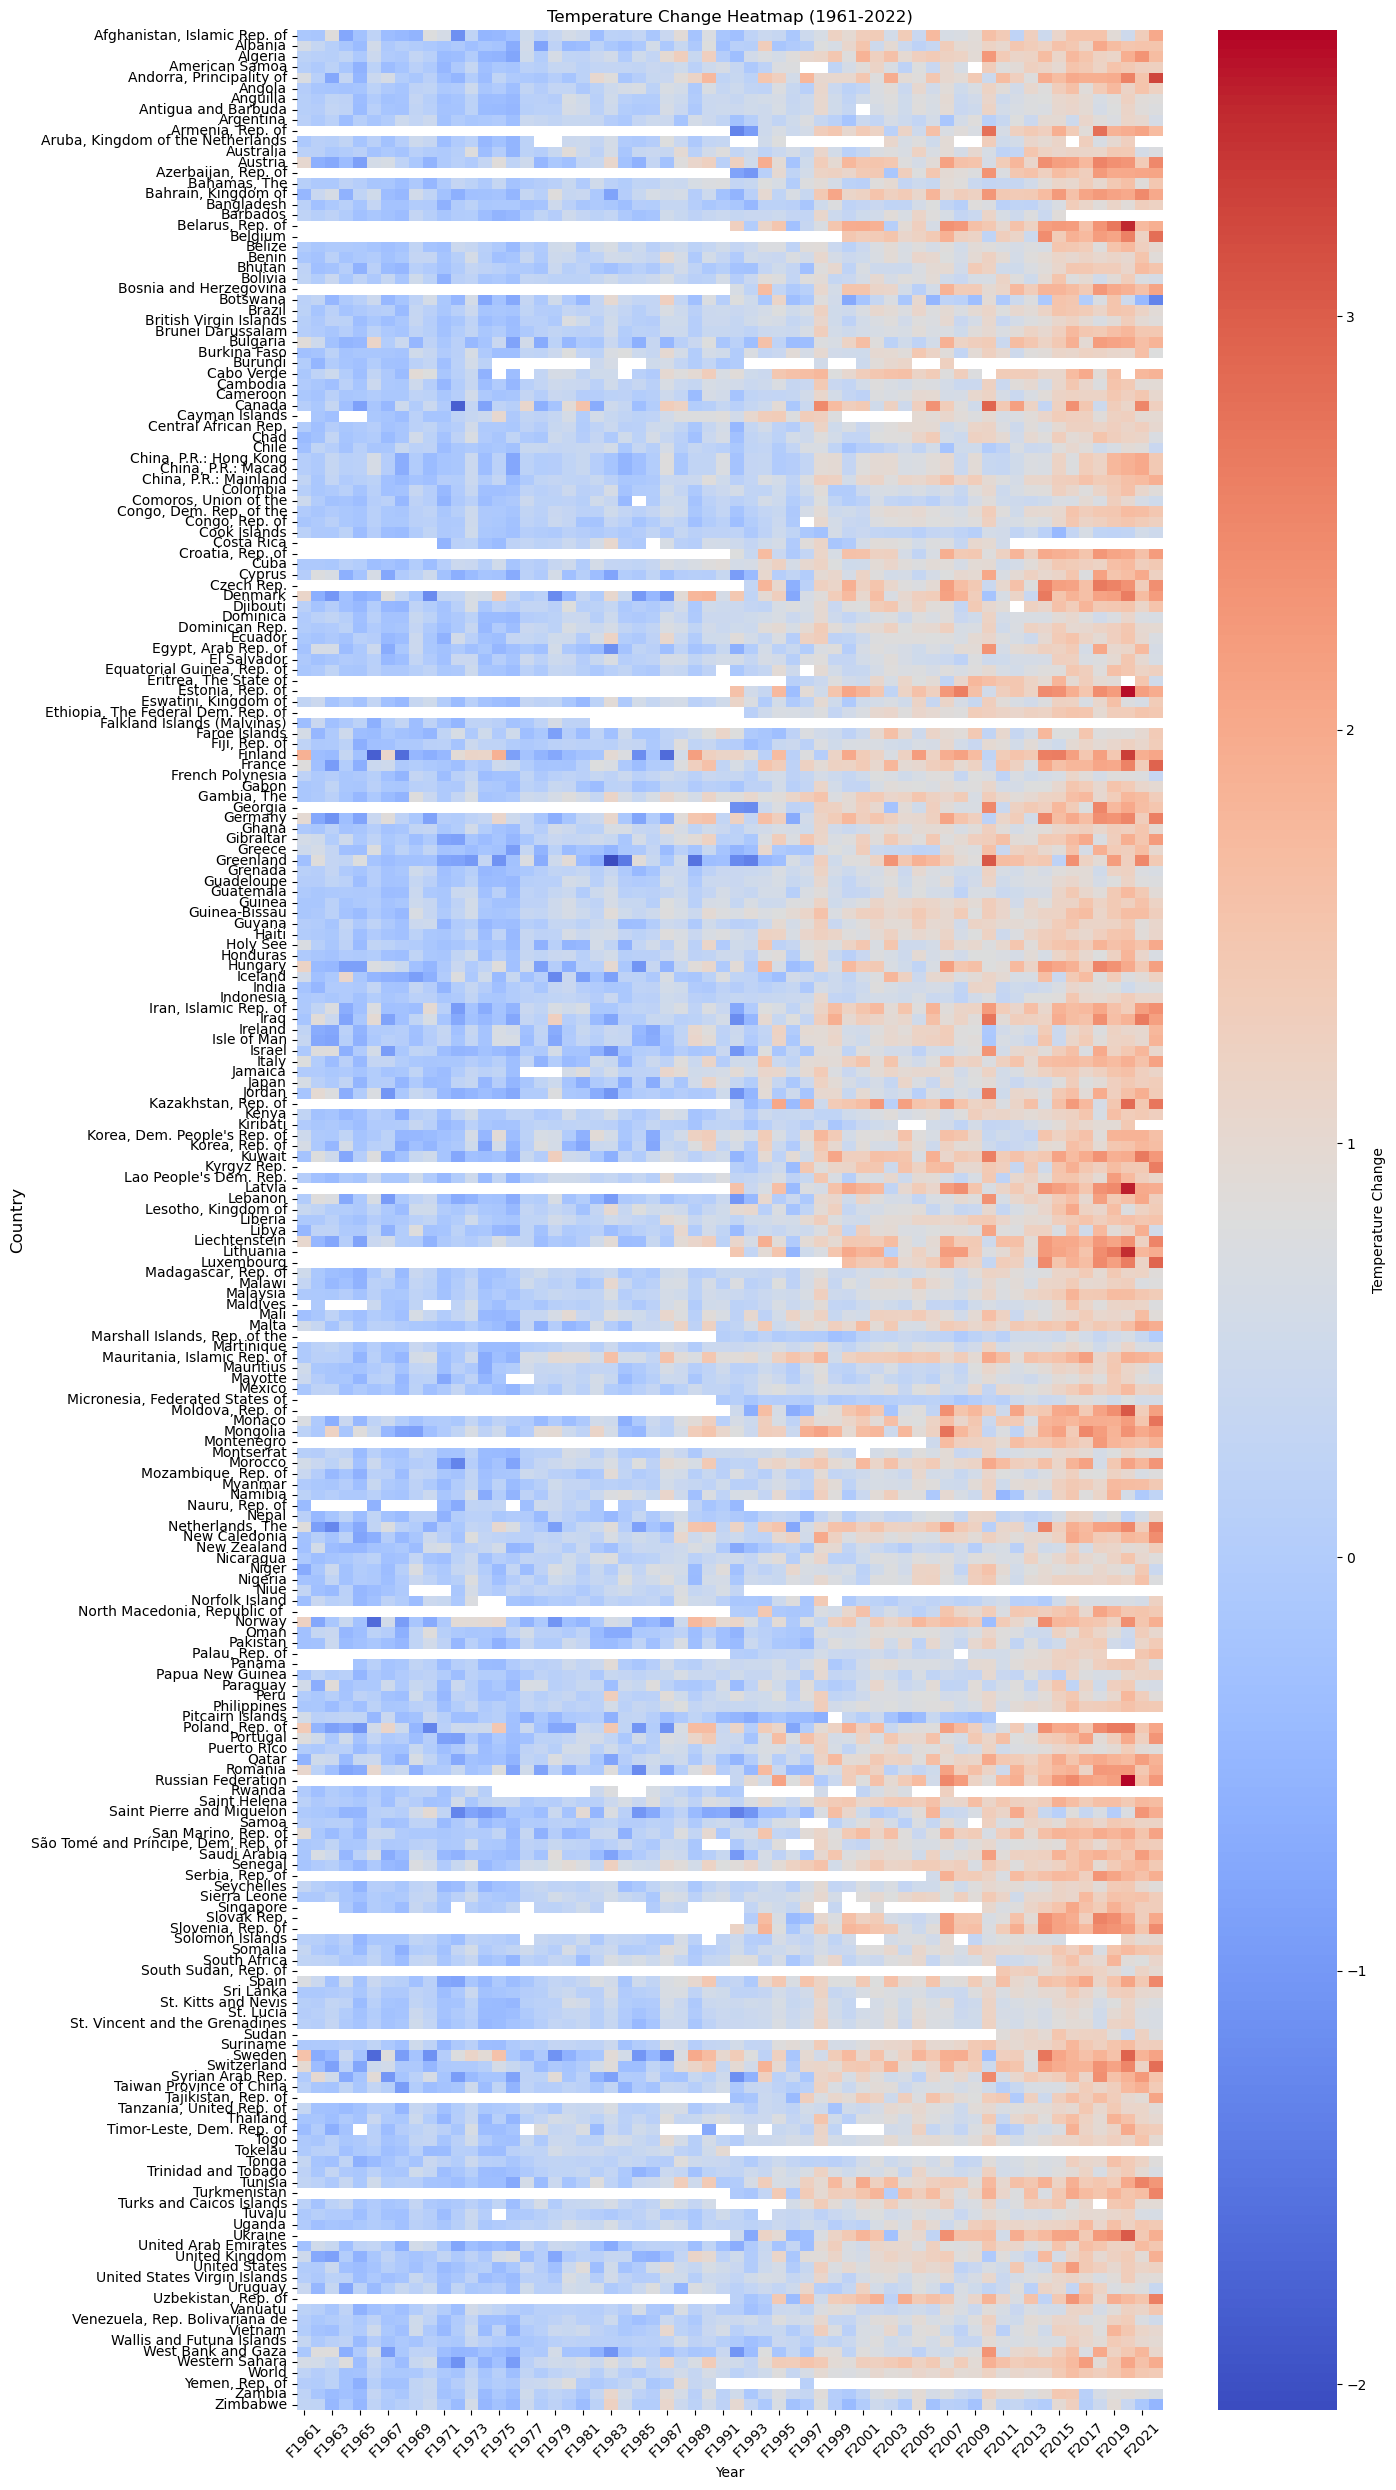

In [10]:
def plot_temperature_heatmap(data):
    country_temperature_data = data.loc[:, "F1961":"F2022"]
    plt.figure(figsize=(14, 25))
    sns.heatmap(country_temperature_data, cmap="coolwarm", yticklabels=data["Country"], cbar_kws={'label': 'Temperature Change'})
    plt.title("Temperature Change Heatmap (1961-2022)")
    plt.xlabel("Year")
    plt.ylabel("Country", fontsize=12)  # Adjusted font size for y-axis labels
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


plot_temperature_heatmap(data)

Enter the countries you want to compare (comma-separated):
Angola, Algeria


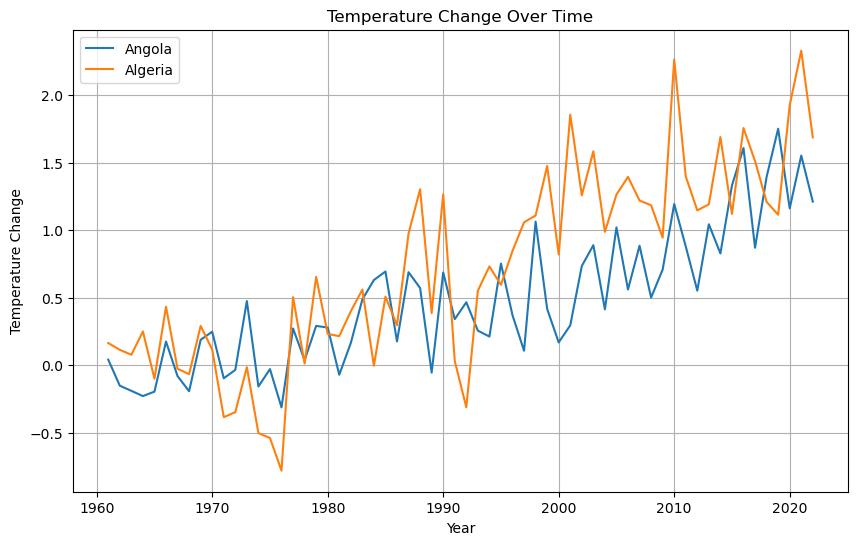

In [11]:
def plot_temperature_countries(country_list, data):
    selected_data = data[data["Country"].isin(country_list)]
    plt.figure(figsize=(10, 6))
    for country in country_list:
        country_data = selected_data[selected_data["Country"] == country]
        sns.lineplot(data=country_data, x='Year', y='Value', label=country)
    plt.title('Temperature Change Over Time')
    plt.xlabel('Year')
    plt.ylabel('Temperature Change')
    plt.legend()
    plt.grid(True)
    plt.show()

all_countries = data_melted['Country'].unique()

def handle_input(input_str):
    selected_countries = [country.strip() for country in input_str.split(',')]
    plot_temperature_countries(selected_countries, data_melted)

print("Enter the countries you want to compare (comma-separated):")
user_input = input()

handle_input(user_input)

The project includes several functions for static data visualization using matplotlib and seaborn. These functions generate plots such as line plots, scatter plots, box plots, and heatmaps to visualize temperature change data over time and across countries.

For example, there are functions to plot temperature change for a specific country over time (plot_temperature_change_country()), compare temperature change between two countries (plot_temperature_comparison()), visualize the distribution of temperature change across all countries (plot_temperature_distribution()), and create a heatmap of temperature change across countries and years (plot_temperature_heatmap()).

These visualizations provide valuable insights into trends, patterns, and variations in temperature change data, enabling stakeholders to better understand the impacts of climate change.

In [12]:
app = dash.Dash(__name__)

# Define layout
app.layout = html.Div([
    html.H1('Climate Change Indicator Dashboard'),
    html.Div([
        dcc.Dropdown(
            id='country-dropdown',
            options=[{'label': country, 'value': country} for country in data_melted['Country'].unique()],
            value=data_melted['Country'].unique()[0]
        ),
        dcc.RadioItems(
            id='visualization-type',
            options=[
                {'label': 'Line Plot', 'value': 'line'},
                {'label': 'Scatter Plot', 'value': 'scatter'},
                {'label': 'Heatmap', 'value': 'heatmap'}
            ],
            value='line',
            labelStyle={'display': 'inline-block'}
        ),
        dcc.RangeSlider(
            id='year-slider',
            min=1961,
            max=2022,
            step=1,
            marks={str(year): str(year) for year in range(1961, 2023, 5)},
            value=[1961, 2022]
        ),
        dcc.Dropdown(
            id='indicator-dropdown',
            options=[{'label': indicator, 'value': indicator} for indicator in data_melted['Indicator'].unique()],
            value=data_melted['Indicator'].unique()[0]
        )
    ]),
    dcc.Graph(id='climate-indicator-plot')
])

# Define callback to update plot based on user input
@app.callback(
    dash.dependencies.Output('climate-indicator-plot', 'figure'),
    [dash.dependencies.Input('country-dropdown', 'value'),
     dash.dependencies.Input('visualization-type', 'value'),
     dash.dependencies.Input('year-slider', 'value'),
     dash.dependencies.Input('indicator-dropdown', 'value')]
)
def update_plot(selected_country, visualization_type, selected_years, selected_indicator):
    filtered_data = data_melted[(data_melted['Country'] == selected_country) &
                         (data_melted['Indicator'] == selected_indicator) &
                         (data_melted['Year'] >= selected_years[0]) &
                         (data_melted['Year'] <= selected_years[1])]
    
    if visualization_type == 'line':
        fig = px.line(filtered_data, x='Year', y='Value', title=f'{selected_indicator} in {selected_country}')
    elif visualization_type == 'scatter':
        fig = px.scatter(filtered_data, x='Year', y='Value', title=f'{selected_indicator} in {selected_country}')
    else:  # Heatmap
        fig = px.imshow(filtered_data.pivot(index='Indicator', columns='Year', values='Value'),
                        labels=dict(x="Year", y="Indicator", color="Value"),
                        title=f'{selected_indicator} Heatmap ({selected_country})')
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

The project leverages Dash, a Python framework for building interactive web applications, to create a climate change indicator dashboard. The dashboard allows users to interactively explore the data by selecting countries, indicators, visualization types, and years using dropdowns, radio buttons, and sliders.

The layout of the dashboard is defined using HTML and Dash components, including html.Div, dcc.Dropdown, dcc.RadioItems, and dcc.Graph. Callback functions are used to update the plot based on user input, ensuring a dynamic and responsive user experience.

Users can choose between different visualization types (line plot, scatter plot, or heatmap) and specify the range of years to display. The selected data is then filtered and plotted using Plotly Express, a high-level interface for creating interactive plots.

The dashboard provides a user-friendly interface for exploring climate change indicators, enabling stakeholders to visualize and analyze the data in real-time, identify trends, and make informed decisions.

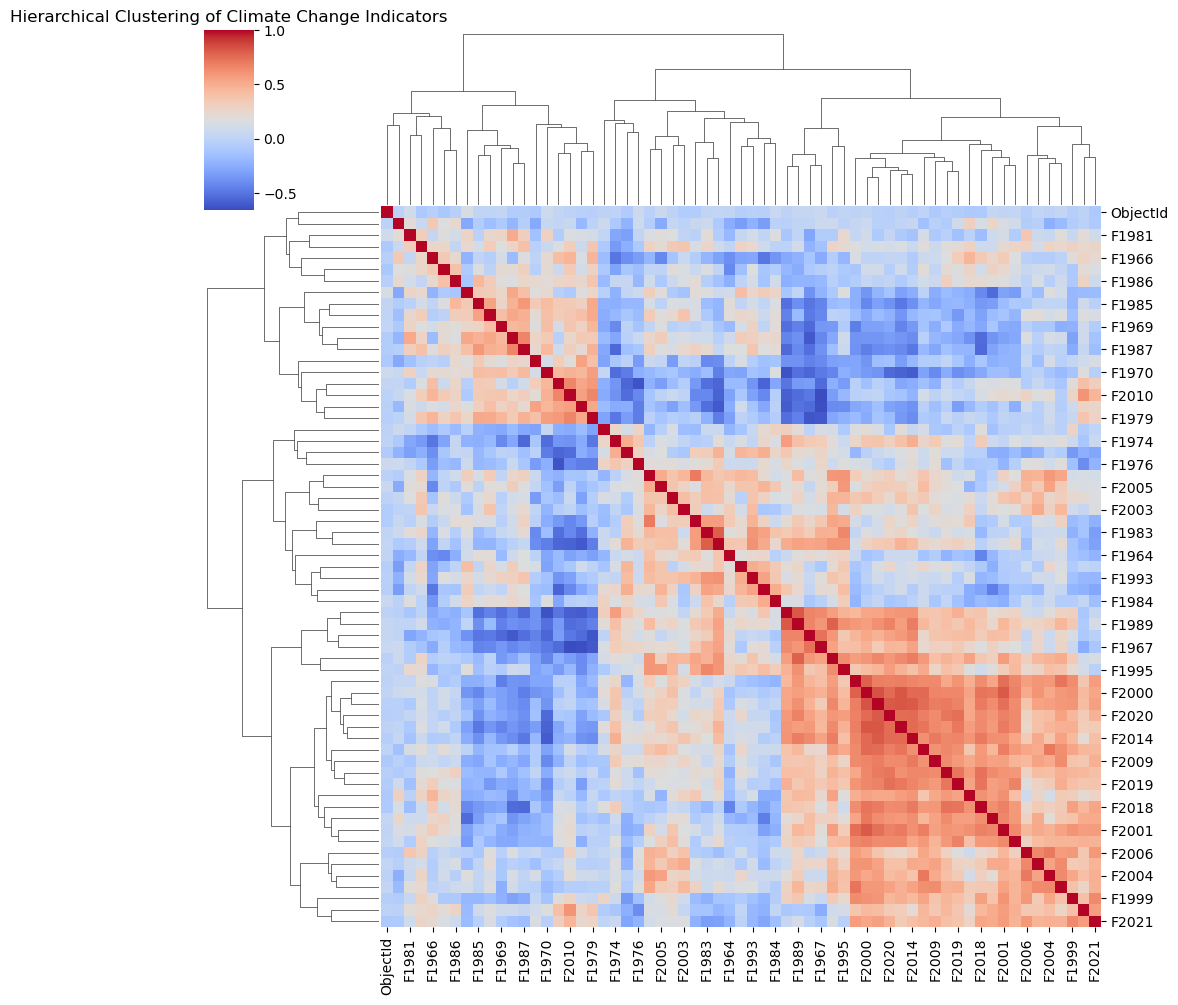

In [13]:
numeric_data = data.select_dtypes(include=np.number)
sns.clustermap(numeric_data.corr(), cmap="coolwarm", figsize=(10, 10))
plt.title("Hierarchical Clustering of Climate Change Indicators")
plt.show()

In [14]:
latlong_data = pd.read_csv('data/world_country_and_usa_states_latitude_and_longitude_values.csv')
merged_data = pd.merge(data, latlong_data[['country', 'latitude', 'longitude']], left_on='Country', right_on='country', how='left')
merged_data = merged_data.dropna(subset=['latitude', 'longitude'])

m = folium.Map(location=[0, 0], zoom_start=2)

for index, row in merged_data.iterrows():
    # Customize marker icon based on climate-related data from the year 2020
    # Example: Change marker color based on a specific climate-related metric for the year 2020
    metric_2020 = row['F2020']
    color = 'green'
    if metric_2020 > 2:
        color = 'red'
    elif metric_2020 > 1:
        color = 'orange'
    
    # Add marker with custom icon and tooltip
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        tooltip=row['Country'],
        icon=folium.Icon(color=color)
    ).add_to(m)

display(m)

The project also includes advanced data analysis techniques such as hierarchical clustering and geospatial mapping. Hierarchical clustering is performed to identify patterns and relationships between different climate change indicators, visualized using a cluster map.

Geospatial mapping is used to plot markers on a map of the world, representing countries with climate-related data. The color of each marker is customized based on a specific climate-related metric for the year 2020, providing insights into the geographical distribution of climate change impacts.

These advanced techniques enhance the depth and complexity of the analysis, allowing stakeholders to explore the data from different perspectives and gain deeper insights into the underlying patterns and trends.

Overall, this data visualization project combines static and interactive visualization techniques with advanced data analysis methods to provide a comprehensive understanding of climate change indicators. It empowers stakeholders to explore, analyze, and interpret the data effectively, facilitating informed decision-making and action towards mitigating the impacts of climate change.